In [1]:
n = input("Enter the number of entangled pair to be used - ")
n = int(n)


Enter the number of entangled pair to be used - 1


In [2]:
from qiskit import * 
%matplotlib inline 
from qiskit.tools.visualization import plot_histogram 
from qiskit.qasm import pi

1 and (qubit[0] != qubit[1])


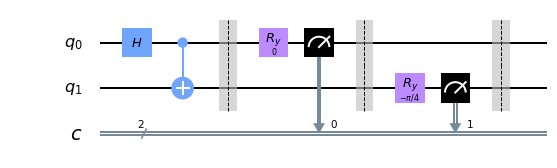

In [3]:
# defining a quantum circuit with n pairs of entangled qubits and n pairs of classical bits 
c = QuantumCircuit(2*n,2*n)

# entangling qubits to Bell state

for i in range(n):
    c.h(2*i)
    c.cx(2*i, 2*i+1)

c.barrier()

# Input at the compile time (Alice's) side 
# For ease of use we  keep the input as 0 

x = ''
for i in range(n):
    x = x + '0' 

# Settting up the compile time(Alice's) measurement strategies based on the input. 
# Measurement of the entangled bit at the compile time side (for each pair)
# Measurement is either in 0-1 base if the input is 0 or in a rotated 0-1 base if the input is 1 
    
for i in range(len(x)):
    
    if x[i] == '0':
        c.ry(0, 2*i)
        c.measure(2*i,2*i)
    if x[i] == '1':
        c.ry(pi/2, 2*i)
        c.measure(2*i,2*i) 
        
c.barrier()

# Input at the compiled code at run-time (Bob's) side 
# For ease of use we  keep the input as 1 

y = ''
for i in range(n):
    y = y + '1' 

# Settting up the compile time(Alice's) measurement strategies based on the input. 
# Measurement of the entangled bit at the compile time side (for each pair)
# Measurement is either in 0-1 base if the input is 0 or in a rotated 0-1 base if the input is 1 
    
for i in range(len(y)):
    
    if y[i] == '0':
        c.ry(pi/4, 2*i+1)
        c.measure(2*i+1,2*i+1)
    if y[i] == '1':
        c.ry(pi/-4, 2*i+1)
        c.measure(2*i+1,2*i+1)
        
c.barrier() 

# Craft the quantum opaque predicate here (qop)
# Qubit values will be stored in classical bits.  
# We will use 'qubit' to represent the measured qubit values


qop = '1'

for i in range(n):
    if((x[i] == '1') and (y[i] == '1')):
        temp = "(qubit[" +str(2*i)+ "] == qubit[" + str(2*i+1)+ "])"
    else:
        temp = "(qubit[" +str(2*i)+ "] != qubit[" + str(2*i+1)+ "])"
    qop = qop + ' and '+ temp

print(qop)

c.draw(output = "mpl")


In [28]:
# Experimental setup
# Runs the quantum circuit 1000 times in a quantum simulator
# Execute the Quantum opaque predicate
# Counts the number of times wrong path is taken

for i in [10,100,1000,10000,100000]:
    sim = Aer.get_backend('qasm_simulator')
    result = execute(c, backend= sim, shots =i).result()
    counts = result.get_counts()
    #plot_histogram(counts)


    wrong_path = 0
    #print(counts)

    for outcome in counts.keys():
        # reverse the bit stream. LBB-> MSB in the string
        qubit = outcome[::-1]
        if (eval(qop)):
                wrong_path = wrong_path + counts[outcome]
    print(i,wrong_path)



10 0
100 0
1000 0
10000 0
100000 0
